                                                        **START OF NOTEBOOK** 

Goal of the Project : 


> Customer is a mobile manufacturer based in the US, which entered the market three years ago. As they are a new entrant in the sector, they want to understand their competitors and preferences of their users so that they can design their strategies accordingly. They want to tweak the marketing strategies to add more value to their brand, provide features to customers that add the most value, and close the demand-supply gap. Their objective is to increase the market share as well as the brand value.



> We will be performing below activities :


> 1. Reading the Data
> 2. Exploratory Data Anlysis
> 3. Text Analysis
> 4. Review Text Classifier : Multinomial Naive Bayes









In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

### **The following data sets are available**



1.   meta data of type .json
2.   phone data of type .csv





The meta data holds information from sellers point of view and the phone data holds user information. We begin by unzipping the meta data file and extracting its content to a list

# **Reading the Data**

In [ ]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/Capstone_project/sentiment_analysis/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/MyDrive/Capstone_project/sentiment_analysis.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [ ]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [ ]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/drive/MyDrive/Capstone_project/sentiment_analysis/Cell_Phones_and_Accessories_5.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


In [ ]:
df_meta.head(5)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


Filter the category with values of Cell Phones **only**


In [ ]:
df_meta['catfilter'] =  [each[1] if len(each)>2 else "" for each in df_meta['category']]
df_meta = df_meta[df_meta['catfilter'] == "Cell Phones"]
df_meta

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,catfilter
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],[https://images-na.ssl-images-amazon.com/image...,,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,8050110508,Cell Phones
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Standard package: 1 x original phone 1 x Qual...,,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",[https://images-na.ssl-images-amazon.com/image...,,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",,B00005KBGR,Cell Phones
1354,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Based on Motorola&#x92;s i90c phone, the i95c...",,Motorola i95cl Phone (Nextel),[],[https://images-na.ssl-images-amazon.com/image...,,,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006J9HH,Cell Phones
1361,"[Cell Phones & Accessories, Cell Phones, Carri...",,[This is a GSM Samsung R225 cellular phone tha...,,T-Mobile Dual-Band Wireless Phone,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006LIQB,Cell Phones
1395,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[Dark Blue OEM faceplate, Wall charger and bat...",,Unlocked Nokia 8290,[],[https://images-na.ssl-images-amazon.com/image...,,Nokia,"[Modes GSM 1900, 2-way Text Messaging, MMS: No...","[>#6,167,064 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00008KGAG,Cell Phones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589898,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[This is a New (Other) item with REAL PHOTOS o...,,Samsung Galaxy Note 5 G920a 32GB Unlocked GSM ...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[This Certified Refurbished product is factory...,"[>#1,391,884 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIMOY5O,Cell Phones
589906,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[The new Xperia Z3 has the highest waterproof ...,,Sony Xperia Z C6616 Unlocked GSM 4G LTE WaterP...,[],[https://images-na.ssl-images-amazon.com/image...,,Sony,"[2G: 850 / 900 / 1800 / 1900, 3G: HSDPA 850 / ...","[>#1,300,328 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIQ9DMY,Cell Phones
589908,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Sim card: Dual SIM dual standby <br> Frequenc...,,Futuretech&reg; V9+ Dustproof Shakeproof smart...,[],[https://images-na.ssl-images-amazon.com/image...,,Future Tech,"[MTK6580 1.3 Ghz, Quad Core, RAM 512MB + ROM 8...","[>#1,797,901 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HIQK3MI,Cell Phones
590015,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[<b>NOTE: US customized 4G version Doogee Vale...,,Doogee Valencia 2 Y100 Pro - Unlocked Cellphon...,[],[https://images-na.ssl-images-amazon.com/image...,,DOOGEE,[US CUSTEMIZED VERSION GSM 850/900/1800/1900MH...,"[>#641,944 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,B01HJ9X65A,Cell Phones


# **Data Pre Processing**


In [ ]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d)-timedelta(hours=2)).strftime('%Y-%m-%d'))


# **Exploratory Data Analysis**

In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE,2014-02-11
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE,2014-02-07
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE,2014-02-03
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE,2014-02-02


In [ ]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9685 entries, 36 to 590019
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      9685 non-null   object
 1   tech1         9685 non-null   object
 2   description   9685 non-null   object
 3   fit           9685 non-null   object
 4   title         9685 non-null   object
 5   also_buy      9685 non-null   object
 6   image         9685 non-null   object
 7   tech2         9685 non-null   object
 8   brand         9685 non-null   object
 9   feature       9685 non-null   object
 10  rank          9685 non-null   object
 11  also_view     9685 non-null   object
 12  details       9685 non-null   object
 13  main_cat      9685 non-null   object
 14  similar_item  9685 non-null   object
 15  date          9685 non-null   object
 16  price         9685 non-null   object
 17  asin          9685 non-null   object
 18  catfilter     9685 non-null   object
dtypes: 

In [ ]:
df_meta.isnull().sum()

category        0
tech1           0
description     0
fit             0
title           0
also_buy        0
image           0
tech2           0
brand           0
feature         0
rank            0
also_view       0
details         0
main_cat        0
similar_item    0
date            0
price           0
asin            0
catfilter       0
dtype: int64

In [ ]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
 12  Date&Time         1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 104.4+ MB


In [ ]:
df_phonedata.isnull().sum()

overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            156
reviewText              768
summary                 525
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
Date&Time                 0
dtype: int64

Style , vote and image columns can be dropped as due to huge null values. 

In [ ]:
df_phonedata.drop(['style','vote','image'], axis = 1, inplace = True)

In [ ]:
df_phonedata.isnull().sum()

overall               0
verified              0
reviewerID            0
asin                  0
reviewerName        156
reviewText          768
summary             525
unixReviewTime        0
review_sentiment      0
Date&Time             0
dtype: int64

Lets delete empty rows as well.

In [ ]:
df_phonedata.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [ ]:
df_phonedata.isnull().sum()

overall             0
verified            0
reviewerID          0
asin                0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
review_sentiment    0
Date&Time           0
dtype: int64

Now we have phonedata with no empty cells.

Lets look at duplicate entries in Metadata table for ASIN

In [ ]:
duplicateASIN = df_meta[df_meta.duplicated('asin')]

In [ ]:
duplicateASIN.shape

(33, 19)

There are Duplicate ASIN in meta data table.  Lets remove duplicate ASIN.

In [ ]:
df_meta.drop_duplicates(subset=['asin'],inplace=True)

In [ ]:
duplicateASIN_removed = df_meta[df_meta.duplicated('asin')]

In [ ]:
duplicateASIN_removed.shape

(0, 19)

All Duplicate ASINS are removed now.

Lets Join both tables by primary key = ASIN using Merge or Inner Join. Join all the ASIN present in Metadata to ASIN common in Phonedata.

In [ ]:
df_phonedata['asin'].describe()

count        1127041
unique         48186
top       B00VH88CJ0
freq            1680
Name: asin, dtype: object

In [ ]:
df_meta['asin'].describe()

count           9652
unique          9652
top       8050110508
freq               1
Name: asin, dtype: object

So phonedata has 1127041 ASIN and metadata has 9652. Now after merge we get only those ASINS for which are common in both tables. Which is intersection result.

In [ ]:
df_merged_data = pd.merge(df_phonedata,df_meta,on='asin')

In [ ]:
df_phonedata.shape

(1127041, 10)

In [ ]:
df_meta.shape

(9652, 19)

In [ ]:
df_merged_data.shape

(62065, 28)

In [ ]:
df_merged_data.head(5)

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,review_sentiment,Date&Time,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,catfilter
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,NEGATIVE,2004-09-20,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,Cell Phones
1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,POSITIVE,2004-07-23,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,Cell Phones
2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,NEGATIVE,2004-07-05,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,Cell Phones
3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,POSITIVE,2004-04-11,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,Cell Phones
4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,POSITIVE,2004-02-18,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,Cell Phones


In [ ]:
nb_analysis = df_merged_data[df_merged_data['verified'] == True]
nb_analysis = df_merged_data[["reviewText","review_sentiment"]]
nb_analysis.head(5)

,reviewText,review_sentiment
0,This phone is ugly and heavy and has a terribl...,NEGATIVE
1,I had the Samsung V205 and then I decided to t...,POSITIVE
2,This is the first Samsung phone I have had and...,NEGATIVE
3,"..and I'm from Europe, where the phones and ne...",POSITIVE
4,This phone is amazingly small and light for a ...,POSITIVE


 

1.   **Tableau Analysis (df_merged_data) and Text Analysis (text_analysis) : Lets consider top 30 brand and Verified = True reviews**
2.   **Naive Bayes Classification (nb_analysis) : All the brand with verified =Truere views** 




In [ ]:
df_merged_data[['brand','reviewText']].groupby('brand')['reviewText'].count().nlargest(30)

brand
Samsung                    15978
BLU                         9162
LG                          6527
Motorola                    4804
Nokia                       4380
Apple                       3656
BlackBerry                  3655
HTC                         2429
Sony                        1546
Huawei                      1391
Asus                         787
ZTE                          625
Tracfone                     622
Alcatel                      507
Posh Mobile                  395
LGIC                         366
Kyocera                      267
Lenovo                       253
Pantech                      230
Microsoft                    223
Palm                         214
TRACFONE WIRELESS, INC.      210
AT&T                         190
Raytine                      190
RCA                          186
MOTCB                        179
Sony Ericsson                162
Samsung Korea                143
CT-Miami LLC                 134
SHARKK                       131
Name

In [ ]:
df_merged_data.shape

(62065, 28)

In [ ]:
top30brand = ['Samsung','BLU','LG','Motorola','Nokia','Apple','BlackBerry','HTC','Sony','Huawei','Asus','Tracfone','ZTE','Alcatel','PoshMobile','LGIC','Lenovo','Kyocera','Pantech','Microsoft','TRACFONEWIRELESS,INC.','RCA',
'Raytine','AT&T','MOTCB','SamsungKorea','SonyEricsson','Palm','CT-MiamiLLC','SHARKK']

In [ ]:
df_merged_data = df_merged_data[df_merged_data['brand'].isin(top30brand)]

In [ ]:
df_merged_data.shape

(58498, 28)

In [ ]:
df_merged_data[['brand','reviewText']].groupby('brand')['reviewText'].count()

brand
AT&T            190
Alcatel         507
Apple          3656
Asus            787
BLU            9162
BlackBerry     3655
HTC            2429
Huawei         1391
Kyocera         267
LG             6527
LGIC            366
Lenovo          253
MOTCB           179
Microsoft       223
Motorola       4804
Nokia          4380
Palm            214
Pantech         230
RCA             186
Raytine         190
SHARKK          131
Samsung       15978
Sony           1546
Tracfone        622
ZTE             625
Name: reviewText, dtype: int64

In [ ]:
df_merged_data = df_merged_data[df_merged_data['verified'] == True]

In [ ]:
df_merged_data.shape

(50438, 28)

Lets drop unwanted Columns

In [ ]:
df_merged_data.columns

Index(['overall', 'verified', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'summary', 'unixReviewTime', 'review_sentiment',
       'Date&Time', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'image', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'details', 'main_cat', 'similar_item', 'date', 'price', 'catfilter'],
      dtype='object')

In [ ]:
df_merged_data.drop(['reviewerID','reviewerName','summary','unixReviewTime','tech1','fit','image','tech2','details'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_merged_data.columns

Index(['overall', 'verified', 'asin', 'reviewText', 'review_sentiment',
       'Date&Time', 'category', 'description', 'title', 'also_buy', 'brand',
       'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date',
       'price', 'catfilter'],
      dtype='object')

**I will use this df_merged_data for tableau visualization. Lets download it so that we can import it into tableau.**

# **Text Analytics**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [ ]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Capstone_project/sentiment_analysis/stop_words_long.txt')]

In [ ]:
pos_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Capstone_project/sentiment_analysis/pos_words.txt')]

In [ ]:
neg_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Capstone_project/sentiment_analysis/neg_words.txt')]

**1. Cleaning the review Text**

** For text analysis , lets extract reviewText and review sentiment and store it in new dataframe called text_analysis.**

1. Convert the reviewText column into type string
2. Keep only data for verified comments
3. Remove STop words from reviewText

In [ ]:
df_merged_data = df_merged_data[df_merged_data['verified'] == True]
df_merged_data["reviewText"] = df_merged_data["reviewText"].astype(str)
text_analysis = df_merged_data[["reviewText","review_sentiment"]]
text_analysis["reviewText"] = text_analysis["reviewText"].astype(str)
text_analysis['reviewText'] = text_analysis['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
text_analysis.head(10)

,reviewText,review_sentiment
3,"..and i'm from europe, where the phones and ne...",POSITIVE
5,the last year or so we have all seen an explos...,POSITIVE
35,"overall, i really like the phone but i have to...",POSITIVE
41,was my mom's phone. she barely used it. just r...,POSITIVE
42,this is a great phone in terms of reception. t...,POSITIVE
43,"i have previously owned the v400, v525, v600, ...",NEGATIVE
47,one great thing about the cell phone industry ...,POSITIVE
75,i've been using this phone for about three wee...,NEGATIVE
76,this is actually a quad-band mobile phone whic...,POSITIVE
79,this is one of the nicest phones i have used. ...,NEGATIVE


Converting reviewText and summary into lowercase

Lets remove the Stop words now 

In [ ]:
text_analysis['reviewText_without_stopwords'] = text_analysis['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
text_analysis.head(10)

,reviewText,review_sentiment,reviewText_without_stopwords
3,"..and i'm from europe, where the phones and ne...",POSITIVE,"..and i'm europe, phones networks better state..."
5,the last year or so we have all seen an explos...,POSITIVE,seen explosion nice color phones market. funct...
35,"overall, i really like the phone but i have to...",POSITIVE,"overall, like phone experienced issues reviewe..."
41,was my mom's phone. she barely used it. just r...,POSITIVE,"mom's phone. barely it. rating list. this, don..."
42,this is a great phone in terms of reception. t...,POSITIVE,great phone terms reception. design flaws. car...
43,"i have previously owned the v400, v525, v600, ...",NEGATIVE,"previously owned v400, v525, v600, v710. am de..."
47,one great thing about the cell phone industry ...,POSITIVE,great cell phone industry country contract exp...
75,i've been using this phone for about three wee...,NEGATIVE,i've using phone weeks t-mobile system ct trav...
76,this is actually a quad-band mobile phone whic...,POSITIVE,actually quad-band mobile phone makes true 'wo...
79,this is one of the nicest phones i have used. ...,NEGATIVE,nicest phones used. traditional flip phone pho...


In [ ]:
text_analysis['reviewText_with_positivewords'] = text_analysis['reviewText_without_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word in (pos_words)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
text_analysis['reviewText_with_Negativewords'] = text_analysis['reviewText_without_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word in (neg_words)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
text_analysis['reviewText_Features'] = text_analysis['reviewText_without_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (neg_words)]))
text_analysis['reviewText_Features_final'] = text_analysis['reviewText_Features'].apply(lambda x: ' '.join([word for word in x.split() if word not in (pos_words)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
text_analysis.head(10)

,reviewText,review_sentiment,reviewText_without_stopwords,reviewText_with_positivewords,reviewText_with_Negativewords,reviewText_Features,reviewText_Features_final
3,"..and i'm from europe, where the phones and ne...",POSITIVE,"..and i'm europe, phones networks better state...",better best amazingly great recommend,,"..and i'm europe, phones networks better state...","..and i'm europe, phones networks states. sams..."
5,the last year or so we have all seen an explos...,POSITIVE,seen explosion nice color phones market. funct...,nice bonus like nice nice well easy foremost w...,not not not don't don't not,seen explosion nice color phones market. funct...,seen explosion color phones market. functional...
35,"overall, i really like the phone but i have to...",POSITIVE,"overall, like phone experienced issues reviewe...",like nice good good nice good great useable pr...,issues lag not cannot,"overall, like phone experienced reviewers also...","overall, phone experienced reviewers also. pro..."
41,was my mom's phone. she barely used it. just r...,POSITIVE,"mom's phone. barely it. rating list. this, don...",,don't,"mom's phone. barely it. rating list. this, wil...","mom's phone. barely it. rating list. this, wil..."
42,this is a great phone in terms of reception. t...,POSITIVE,great phone terms reception. design flaws. car...,great easy useful nice,limited difficult not impossible useless impos...,great phone terms reception. design flaws. car...,phone terms reception. design flaws. carrying ...
43,"i have previously owned the v400, v525, v600, ...",NEGATIVE,"previously owned v400, v525, v600, v710. am de...",glad nicest reliable,complaint,"previously owned v400, v525, v600, v710. am de...","previously owned v400, v525, v600, v710. am de..."
47,one great thing about the cell phone industry ...,POSITIVE,great cell phone industry country contract exp...,great great great good great great important e...,don't interruptions not limited disable no not...,great cell phone industry country contract exp...,cell phone industry country contract expires y...
75,i've been using this phone for about three wee...,NEGATIVE,i've using phone weeks t-mobile system ct trav...,easy pros pretty well clearly clear helpful ca...,flaws not unexpected cannot doesn't cons diffi...,i've using phone weeks t-mobile system ct trav...,i've using phone weeks t-mobile system ct trav...
76,this is actually a quad-band mobile phone whic...,POSITIVE,actually quad-band mobile phone makes true 'wo...,well great vivid great modern ease,don't no curses indistinguishable couldn't bot...,actually quad-band mobile phone makes true 'wo...,actually quad-band mobile phone makes true 'wo...
79,this is one of the nicest phones i have used. ...,NEGATIVE,nicest phones used. traditional flip phone pho...,nicest works,,nicest phones used. traditional flip phone pho...,phones used. traditional flip phone phone phon...


In [ ]:
import nltk
nltk.download('punkt')

#nltk.download("stopwords")
#from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# extract the review text from the dataframe
all_words = text_analysis.reviewText_without_stopwords
print(all_words)

3        ..and i'm europe, phones networks better state...
5        seen explosion nice color phones market. funct...
35       overall, like phone experienced issues reviewe...
41       mom's phone. barely it. rating list. this, don...
42       great phone terms reception. design flaws. car...
                               ...                        
62059    like: 1) solid build 2) unlocked means no carr...
62060    phone stolen not activate all. told comes stol...
62061                                                 good
62062    purchased problems finally tossed them,screens...
62063                                            excelente
Name: reviewText_without_stopwords, Length: 50438, dtype: object


In [ ]:
# convert review text into list
all_words = [reviewText_without_stopwords for reviewText_without_stopwords in all_words]


In [ ]:
all_words = ''.join(all_words)

In [ ]:
all_words_list = all_words.split()


In [ ]:
from nltk import FreqDist
import seaborn as sns
%matplotlib inline

In [ ]:
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(labels, counts)
    return plot

**2. Bag of Words**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


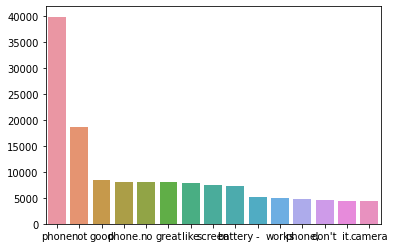

In [ ]:
plot_word_frequency(all_words_list, 15)

**3. Positive and Negative words corpuses**

**POSITIVE WORD FREQUENCY**

In [ ]:
pos_words = text_analysis.reviewText_with_positivewords
print(pos_words)

3                    better best amazingly great recommend
5        nice bonus like nice nice well easy foremost w...
35       like nice good good nice good great useable pr...
41                                                        
42                                  great easy useful nice
                               ...                        
62059    solid quicker excellent like loved favorite li...
62060                                           appreciate
62061                                                 good
62062                                                great
62063                                                     
Name: reviewText_with_positivewords, Length: 50438, dtype: object


In [ ]:
pos_words = [reviewText_with_positivewords for reviewText_with_positivewords in pos_words]


In [ ]:
pos_words = ''.join(pos_words)
pos_words_list = pos_words.split()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


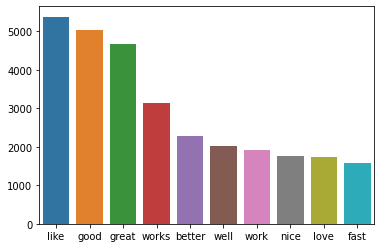

In [ ]:
plot_word_frequency(pos_words_list, 10)

**NEGATIVE WORD FREQUENCY**

In [ ]:
neg_words = text_analysis.reviewText_with_Negativewords
print(neg_words)

3                                                         
5                              not not not don't don't not
35                                   issues lag not cannot
41                                                   don't
42       limited difficult not impossible useless impos...
                               ...                        
62059    no don't not wouldn't miss not not doesn't spi...
62060                                     stolen not don't
62061                                                     
62062                               problems disappointing
62063                                                     
Name: reviewText_with_Negativewords, Length: 50438, dtype: object


In [ ]:
neg_words = [reviewText_with_Negativewords for reviewText_with_Negativewords in neg_words]


In [ ]:
neg_words = ''.join(neg_words)
neg_words_list = neg_words.split()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


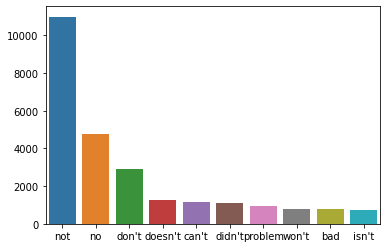

In [ ]:
plot_word_frequency(neg_words_list, 10)

# **Features responsible for NEGATIVE Sentiment**

In [ ]:
negative_text_analysis = text_analysis[text_analysis['review_sentiment'] == 'NEGATIVE']

In [ ]:
neg_feature = negative_text_analysis.reviewText_Features_final
neg_feature = [reviewText_Features_final for reviewText_Features_final in neg_feature]

Lets remove some of the other possible stop words

In [ ]:
from itertools import groupby
char_list = ['phone', 'it.','am','got','buy','-','bought',"i'm",'2','4','gracias','distysh','pingnt','!','signal','1','%','pcs','guess','blu','country','studio','store','christmas','original','time','card','using','little','it,','call','3','months',"i've",'el','day',',','.','expected','en','lo','muy','de','producto','buen','la','que','+','product','ddd','returned','star','week']
  
# Remove words containing list characters
# using list comprehension + all()
neg_feature = [ele for ele in neg_feature if all(ch not in ele for ch in char_list)]


In [ ]:
neg_feature = ''.join(neg_feature)
neg_words_list = neg_feature.split()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


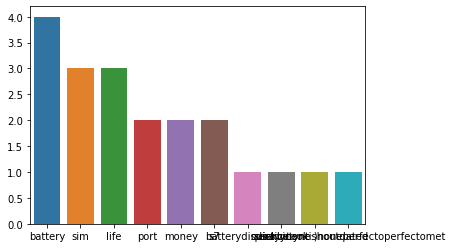

In [ ]:
plot_word_frequency(neg_words_list, 10)

(-0.5, 399.5, 199.5, -0.5)

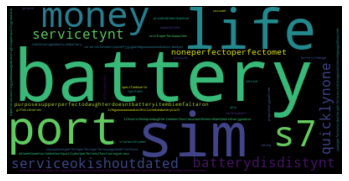

In [ ]:
wordcloud = WordCloud().generate(neg_feature)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# **Features responsible for POSITIVE Sentiment**

In [ ]:
positive_text_analysis = text_analysis[text_analysis['review_sentiment'] == 'POSITIVE']

In [ ]:
pos_feature = positive_text_analysis.reviewText_Features_final
pos_feature = [reviewText_Features_final for reviewText_Features_final in pos_feature]

Lets remove some of the other possible stop words

In [ ]:
from itertools import groupby
char_list = ['phone', 'it.','am','got','buy','-','cell','bought',"i'm",'2','time','price.','card','using','little','.','it,','call','3','months',"i've",',','100%','product']

# Remove words containing list characters
# using list comprehension + all()
pos_feature = [ele for ele in pos_feature if all(ch not in ele for ch in char_list)]

In [ ]:
pos_feature = ''.join(pos_feature)
pos_words_list = pos_feature.split()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


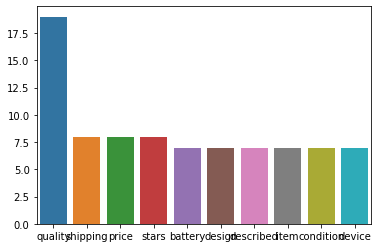

In [ ]:
plot_word_frequency(pos_words_list, 10)

(-0.5, 399.5, 199.5, -0.5)

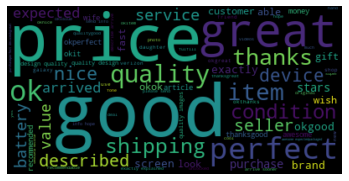

In [ ]:
wordcloud = WordCloud().generate(pos_feature)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

**WORD CLOUD for Postive and Negative words**

(-0.5, 399.5, 199.5, -0.5)

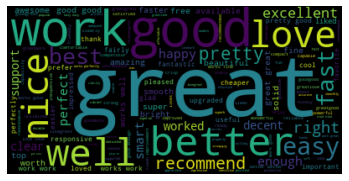

In [ ]:
wordcloud = WordCloud().generate(pos_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

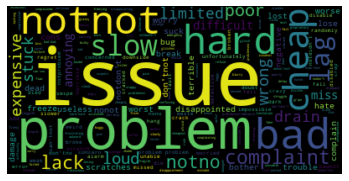

In [ ]:
wordcloud = WordCloud().generate(neg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
from google.colab import files
df_merged_data.to_csv(r'C:\Users\darsh\Downloads\Web Analytics Capstone project\export_mergeddata.csv', index = False, header=True)
files.download(r'C:\Users\darsh\Downloads\Web Analytics Capstone project\export_mergeddata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **3.Review Text Classifier : Multinomial Naive Bayes**

The notebook is divided into the following sections:

1.   Importing and preprocessing data
2.   Building the model: Multinomial Naive Bayes
   
  *   Model building
  *   Model evaluation


        

1. Importing and Preprocessing Data

In [ ]:
import pandas as pd

nb_analysis.head(5)

,reviewText,review_sentiment
0,This phone is ugly and heavy and has a terribl...,NEGATIVE
1,I had the Samsung V205 and then I decided to t...,POSITIVE
2,This is the first Samsung phone I have had and...,NEGATIVE
3,"..and I'm from Europe, where the phones and ne...",POSITIVE
4,This phone is amazingly small and light for a ...,POSITIVE


In [ ]:
# number of review text
len(nb_analysis)

62065

In [ ]:
# counting Positive and Negative reviews
nb_analysis[['review_sentiment','reviewText']].groupby('review_sentiment')['reviewText'].count()

review_sentiment
NEGATIVE    15714
POSITIVE    46351
Name: reviewText, dtype: int64

26% is negative. Its not too bad. This imbalance is OK to proceed.

In [ ]:
# mapping labels to 0 and 1

new_data = { "POSITIVE":"1",
             "NEGATIVE":"0",
             }
  
# combine this new data with existing DataFrame
nb_analysis["review_sentiment_num"] = nb_analysis["review_sentiment"].map(new_data)


In [ ]:
nb_analysis.head(5)

,reviewText,review_sentiment,review_sentiment_num
0,This phone is ugly and heavy and has a terribl...,NEGATIVE,0
1,I had the Samsung V205 and then I decided to t...,POSITIVE,1
2,This is the first Samsung phone I have had and...,NEGATIVE,0
3,"..and I'm from Europe, where the phones and ne...",POSITIVE,1
4,This phone is amazingly small and light for a ...,POSITIVE,1


In [ ]:
# we can now drop the column 'review_sentiment'
nb_analysis = nb_analysis.drop('review_sentiment', axis=1)
nb_analysis.head()

,reviewText,review_sentiment_num
0,This phone is ugly and heavy and has a terribl...,0
1,I had the Samsung V205 and then I decided to t...,1
2,This is the first Samsung phone I have had and...,0
3,"..and I'm from Europe, where the phones and ne...",1
4,This phone is amazingly small and light for a ...,1


In [ ]:
# convert to X and y
X = nb_analysis.reviewText
y = nb_analysis.review_sentiment_num
print(X.shape)
print(y.shape)

(62065,)
(62065,)


In [ ]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train.head()

33254    I ordered my samsung galaxy s5 through amazon ...
58971    Excellent smartphone with great features and f...
19407              Works as expected and used as intended.
56245    <div id="video-block-R3R6JEUOIJPC5Z" class="a-...
16381    Great phone. it is exactly as it has been desc...
Name: reviewText, dtype: object

In [ ]:
y_train.head()

33254    1
58971    1
19407    0
56245    1
16381    1
Name: review_sentiment_num, dtype: object

In [ ]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [ ]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [ ]:
# printing the vocabulary
vect.vocabulary_

{'ordered': 22637,
 'samsung': 27647,
 'galaxy': 14444,
 's5': 27509,
 'amazon': 3534,
 'wear': 34439,
 'house': 16303,
 'selected': 28125,
 'used': 33521,
 'like': 19108,
 'new': 21675,
 'received': 26002,
 'phone': 23752,
 'day': 9701,
 'perfect': 23531,
 'condition': 8442,
 'came': 6902,
 'nicely': 21735,
 'packaged': 23050,
 'sims': 28782,
 'card': 7036,
 'plugged': 24142,
 'booted': 6177,
 'phones': 23779,
 'operating': 22546,
 'ran': 25717,
 'smooth': 29210,
 'works': 35011,
 'runs': 27452,
 'grate': 15163,
 'lag': 18604,
 'camera': 6905,
 'definitely': 9964,
 'brag': 6300,
 'overall': 22859,
 'great': 15196,
 'experience': 12810,
 'excellent': 12602,
 'smartphone': 29157,
 'features': 13285,
 'flawless': 13650,
 'operation': 22547,
 'far': 13154,
 'user': 33532,
 'friendly': 14143,
 'customizable': 9462,
 'lots': 19470,
 'apps': 3993,
 'included': 16979,
 'calling': 6881,
 'work': 34986,
 'best': 5645,
 'bang': 5229,
 'buck': 6520,
 'buy': 6715,
 'recommend': 26097,
 'expected':

In [ ]:
# vocab size
len(vect.vocabulary_.keys())

35621

In [ ]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

**2. Building and Evaluating the Model**

In [ ]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [ ]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB()

**Model Evaluation**

In [ ]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8604111619514081

In [ ]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[ 2365,  1628],
       [  538, 10986]])

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[ 2365  1628]
 [  538 10986]]


In [ ]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9533148212426241


In [ ]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.5922865013774105


In [ ]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class,pos_label='1'))


precision 0.8709370540669098
0.8709370540669098


In [ ]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class,pos_label='1'))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class,pos_label='1'))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class,pos_label='1'))

precision 0.8709370540669098
PRECISION SCORE : 0.8709370540669098
RECALL SCORE : 0.9533148212426241
F1 SCORE : 0.9102659706686552


In [ ]:
y_pred_class

array(['0', '1', '1', ..., '1', '0', '1'], dtype='<U1')

In [ ]:
y_pred_proba

array([[9.96058185e-01, 3.94181522e-03],
       [1.22365561e-01, 8.77634439e-01],
       [1.12331678e-02, 9.88766832e-01],
       ...,
       [2.39179499e-07, 9.99999761e-01],
       [9.98017617e-01, 1.98238343e-03],
       [3.65969847e-01, 6.34030153e-01]])

In [ ]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1],pos_label='1')
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
# area under the curve
print (roc_auc)

0.8925300810608081


In [ ]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.109424,0.007263
2,1.000000e+00,0.109511,0.007263
3,1.000000e+00,0.110552,0.007263
4,1.000000e+00,0.112548,0.007764
...,...,...,...
3245,4.455482e-37,0.999826,0.998497
3246,1.257650e-37,0.999913,0.998497
3247,1.397226e-42,0.999913,0.998748
3248,9.907691e-54,1.000000,0.998748


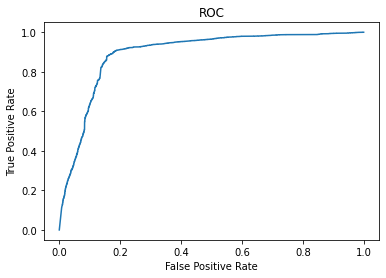

In [ ]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

Observation : Area under the curve is 89% is good. But certainly it could be have been improved more with stematize and lemmetatize methods.